In [1]:
from Frozen_Lake import FrozenLakeEnv
import numpy as np
import time
from tqdm.notebook import tqdm

In [2]:
env = FrozenLakeEnv()

In [3]:
all_states = env.get_all_states()

In [4]:
for state in all_states:
    print(env.get_possible_actions(state))

('left', 'down', 'right', 'up')
('left', 'down', 'right', 'up')
('left', 'down', 'right', 'up')
('left', 'down', 'right', 'up')
('left', 'down', 'right', 'up')
()
('left', 'down', 'right', 'up')
()
('left', 'down', 'right', 'up')
('left', 'down', 'right', 'up')
('left', 'down', 'right', 'up')
()
()
('left', 'down', 'right', 'up')
('left', 'down', 'right', 'up')
()


In [5]:
env.render()

*FFF
FHFH
FFFH
HFFG



In [6]:
for state in all_states:
    print(state, env.is_terminal(state))

(0, 0) False
(0, 1) False
(0, 2) False
(0, 3) False
(1, 0) False
(1, 1) True
(1, 2) False
(1, 3) True
(2, 0) False
(2, 1) False
(2, 2) False
(2, 3) True
(3, 0) True
(3, 1) False
(3, 2) False
(3, 3) True


In [7]:
action = 'right'
env.step(action)

((0, 1), 0.0, False, {})

In [8]:
env.render()

S*FF
FHFH
FFFH
HFFG



In [9]:
def init_policy(env):
    policy = {}
    for state in env.get_all_states():
        policy[state] = {}
        for action in env.get_possible_actions(state):
            policy[state][action] = 1 / len(env.get_possible_actions(state))
    return policy

In [10]:
policy = init_policy(env)

In [11]:
policy

{(0, 0): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (0, 1): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (0, 2): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (0, 3): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (1, 0): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (1, 1): {},
 (1, 2): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (1, 3): {},
 (2, 0): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (2, 1): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (2, 2): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (2, 3): {},
 (3, 0): {},
 (3, 1): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (3, 2): {'left': 0.25, 'down': 0.25, 'right': 0.25, 'up': 0.25},
 (3, 3): {}}

In [12]:
def get_q_values(values, gamma):
    q_values = {}
    for state in env.get_all_states():
        q_values[state] = {}
        for action in env.get_possible_actions(state):
            q_values[state][action] = 0
            for next_state in env.get_next_states(state, action):
                reward = env.get_reward(state, action, next_state)
                transition_prob = env.get_transition_prob(state, action, next_state)
                next_value = values[next_state]
                q_values[state][action] += reward + gamma * transition_prob  * next_value
                
    return q_values

In [13]:
def policy_evaluation_step(policy, values, gamma):
    q_values = get_q_values(values, gamma)
    new_values = {}
    for state in env.get_all_states():
        new_values[state] = 0
        for action in env.get_possible_actions(state):
            new_values[state] += policy[state][action] * q_values[state][action]
    return new_values

In [14]:
def init_values():
    return {state: 0 for state in env.get_all_states()}

In [15]:
values = init_values()

In [30]:
values = policy_evaluation_step(policy, values, gamma=0.9)
values

{(0, 0): 0.01188949873706471,
 (0, 1): 0.011581819099466687,
 (0, 2): 0.02918237164077384,
 (0, 3): 0.011589190820788946,
 (1, 0): 0.019156877327583893,
 (1, 1): 0,
 (1, 2): 0.07849319994372203,
 (1, 3): 0,
 (2, 0): 0.05525166977128362,
 (2, 1): 0.17214355129546768,
 (2, 2): 0.3203080358980066,
 (2, 3): 0,
 (3, 0): 0,
 (3, 1): 0.39047141755825837,
 (3, 2): 1.1738161572774712,
 (3, 3): 0}

In [26]:
def policy_evaluation(policy, gamma, evaluation_step_n):
    values = init_values()
    for _ in range(evaluation_step_n):
        values = policy_evaluation_step(policy, values, gamma)
    q_values = get_q_values(values, gamma)
    return q_values

In [27]:
q_values = policy_evaluation(policy, gamma=0.9, evaluation_step_n=100)
q_values

{(0, 0): {'left': 0.01269467224209061,
  'down': 0.01686835383364247,
  'right': 0.012144295423787095,
  'up': 0.012019806754968413},
 (0, 1): {'left': 0.010810946369242779,
  'down': 0.003926884642953189,
  'right': 0.02288425734125813,
  'up': 0.013047390910454756},
 (0, 2): {'left': 0.01894863177964506,
  'down': 0.05913279233708525,
  'right': 0.018723477626703882,
  'up': 0.02399617635557818},
 (0, 3): {'left': 0.022856113072140482,
  'down': 0.0038299432715476027,
  'right': 0.010007271128880437,
  'up': 0.012725295386107992},
 (1, 0): {'left': 0.020770851485297476,
  'down': 0.04215541625130152,
  'right': 0.006251421320818339,
  'up': 0.011485811856364976},
 (1, 1): {},
 (1, 2): {'left': 0.031600450021849,
  'down': 0.23105940611697157,
  'right': 0.031600450021849,
  'up': 0.021744194057820434},
 (1, 3): {},
 (2, 0): {'left': 0.04215541625130152,
  'down': 0.020596453163186004,
  'right': 0.1262460665953063,
  'up': 0.03511588332766514},
 (2, 1): {'left': 0.07554391068366469,


In [28]:
def policy_improvement(q_values):
    new_policy = {}
    for state in env.get_all_states():
        new_policy[state] = {}
        max_action = None
        max_q_value = float('-inf')
        for action in env.get_possible_actions(state):
            if q_values[state][action] > max_q_value:
                max_q_value = q_values[state][action]
                max_action = action
        for action in env.get_possible_actions(state):
            new_policy[state][action] = 1 if action == max_action else 0
    return new_policy

In [29]:
policy_improvement(q_values)

{(0, 0): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (0, 1): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (0, 2): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (0, 3): {'left': 1, 'down': 0, 'right': 0, 'up': 0},
 (1, 0): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (1, 1): {},
 (1, 2): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (1, 3): {},
 (2, 0): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (2, 1): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (2, 2): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (2, 3): {},
 (3, 0): {},
 (3, 1): {'left': 0, 'down': 0, 'right': 1, 'up': 0},
 (3, 2): {'left': 0, 'down': 1, 'right': 0, 'up': 0},
 (3, 3): {}}

In [37]:
epochs = 20
evaluation_step_n = 60
gammas = np.linspace(0, 1, 20)
policies = []

policy = init_policy(env)
for gamma in gammas:
    for epoch in range(epochs):
        q_values = policy_evaluation(policy, gamma, evaluation_step_n)
        policy = policy_improvement(q_values)
    policies += [policy]

In [40]:
mean_rewards = []
for policy in policies:
    mean_reward = 0
    for i in tqdm(range(10000), colour='blue', leave=True):
        total_reward = 0
        state = env.reset()
        for _ in range(100):
            action = np.random.choice(env.get_possible_actions(state), p=list(policy[state].values()))
            state, reward, done, _ = env.step(action)
            #env.render()
            #time.sleep(0.5)
            total_reward += reward

            if done:
                break

        mean_reward += total_reward
    mean_reward /= 10000
    mean_rewards += [mean_reward]
    print(mean_reward)

  0%|          | 0/10000 [00:00<?, ?it/s]

0.0


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7402


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7401


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7424


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7372


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7438


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7382


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7413


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7464


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7426


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7356


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7414


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7404


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7432


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7391


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7402


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7341


  0%|          | 0/10000 [00:00<?, ?it/s]

0.745


  0%|          | 0/10000 [00:00<?, ?it/s]

0.7391


  0%|          | 0/10000 [00:00<?, ?it/s]

0.8653


In [41]:
import matplotlib.pyplot as plt

In [47]:
print(len(gammas), len(mean_rewards))

20 20


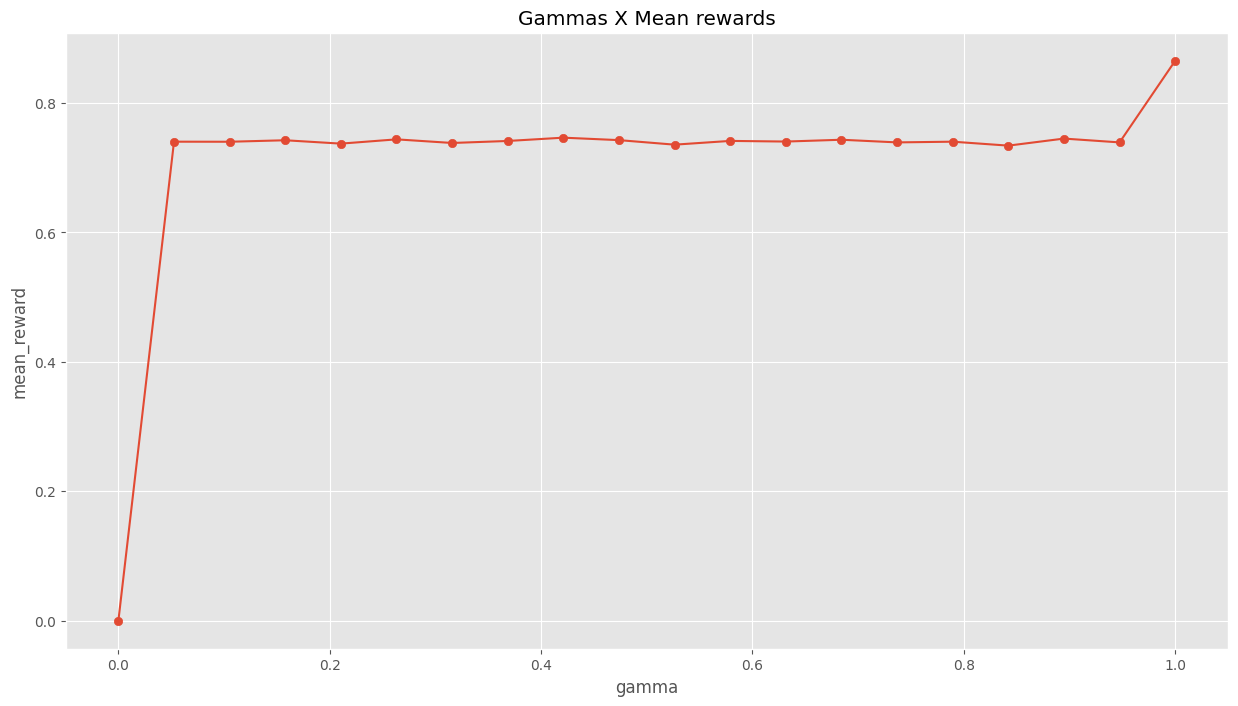

In [57]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(15, 8))
    plt.plot(gammas, mean_rewards)
    plt.scatter(gammas, mean_rewards)
    plt.xlabel('gamma')
    plt.ylabel('mean_reward')
    plt.title('Gammas X Mean rewards')
    plt.show()